# Additional analysis for project

---

## Imports

#### Python libraries

In [26]:
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

#### Data

In [6]:
df_ime = pd.read_csv("Marginacion_2015.csv")
df_ime

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,Bajo,28,2015
1,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,Muy bajo,30,2015
2,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,Bajo,22,2015
3,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,Alto,10,2015
4,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,Muy bajo,29,2015
5,6,Colima,711235,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18,-0.73,Bajo,26,2015
6,7,Chiapas,5217908,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46,2.41,Muy alto,2,2015
7,8,Chihuahua,3556574,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77,-0.60,Bajo,23,2015
8,9,Distrito Federal,8918653,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26,-1.45,Muy bajo,32,2015
9,10,Durango,1754754,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16,0.05,Medio,13,2015


In [36]:
list(df_ime["GM"].unique())

['Bajo', 'Muy bajo', 'Alto', 'Muy alto', 'Medio']

In [35]:
res = {}
i = 0

for gm_v in df_ime["GM"].unique():
    
    m1 = df_ime["GM"] == gm_v
    
    res[str(i) + "_" + gm_v] = {
        "min": min(df_ime.loc[m1, "IM"]),
        "max": max(df_ime.loc[m1, "IM"])
    }
    
    i += 1

res

{'0_Bajo': {'min': -0.89, 'max': -0.49},
 '1_Muy bajo': {'min': -1.45, 'max': -1.1},
 '2_Alto': {'min': 0.46, 'max': 1.14},
 '3_Muy alto': {'min': 2.12, 'max': 2.56},
 '4_Medio': {'min': -0.37, 'max': 0.31}}

---

## Clustering tutorial
- Sources
    - [An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)

### Importing data

In [16]:
raw_sample_data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [46]:
smp_data = raw_sample_data[0]
print(smp_data.shape)
smp_data

(200, 2)


array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1.

In [47]:
smp_labs = raw_sample_data[1]
print(smp_labs.shape)
smp_labs

(200,)


array([2, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 3,
       0, 0, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 3, 3, 1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 1, 0,
       0, 3, 2, 3, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 0, 3, 0, 1, 2, 1, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 1, 3, 0, 2, 1, 3,
       1, 2])

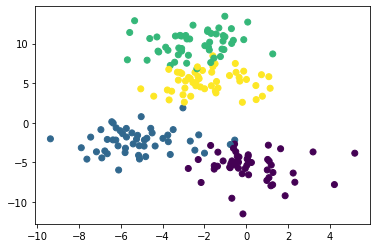

In [23]:
plt.scatter(
    x=smp_data[:, 0],
    y=smp_data[:, 1],
    c=smp_labs
)

### Applying k-means ++

In [39]:
# create kmeans object

kmeans = KMeans(n_clusters=4)# fit kmeans object to data

kmeans.fit(smp_data)# print location of clusters learned by kmeans object

print(kmeans.cluster_centers_)# save new clusters for chart

y_km = kmeans.fit_predict(smp_data)

[[ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]]


In [48]:
print(y_km.shape)
y_km

(200,)


array([3, 0, 1, 3, 2, 0, 3, 0, 0, 2, 2, 3, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1,
       3, 3, 3, 1, 3, 0, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 1, 1, 3, 2, 1, 1,
       0, 0, 3, 1, 1, 3, 0, 2, 1, 3, 1, 1, 0, 2, 2, 1, 0, 0, 3, 0, 0, 3,
       0, 1, 3, 3, 0, 2, 3, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 3, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 1, 0, 2, 3,
       0, 2, 3, 3, 2, 1, 3, 3, 1, 0, 3, 1, 3, 3, 0, 3, 3, 1, 1, 0, 2, 0,
       0, 1, 3, 1, 0, 3, 3, 2, 3, 1, 1, 0, 2, 3, 0, 1, 0, 2, 3, 2, 1, 0,
       0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 3, 1, 0, 1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 1, 2, 1, 0, 3, 2, 1,
       2, 3], dtype=int32)

---

## Clustering exercise

In [52]:
df_ime

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,Bajo,28,2015
1,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,Muy bajo,30,2015
2,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,Bajo,22,2015
3,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,Alto,10,2015
4,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,Muy bajo,29,2015
5,6,Colima,711235,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18,-0.73,Bajo,26,2015
6,7,Chiapas,5217908,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46,2.41,Muy alto,2,2015
7,8,Chihuahua,3556574,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77,-0.60,Bajo,23,2015
8,9,Distrito Federal,8918653,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26,-1.45,Muy bajo,32,2015
9,10,Durango,1754754,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16,0.05,Medio,13,2015


In [53]:
d_cols = [
    "ANALF",
    "SPRIM"
]

In [54]:
df_ime_cd = df_ime.loc[:, d_cols]
df_ime_cd

,ANALF,SPRIM
0,2.60,11.89
1,1.96,10.46
2,2.51,11.59
3,6.68,18.56
4,1.99,9.56
5,3.90,15.24
6,14.98,31.71
7,2.67,12.65
8,1.49,6.62
9,3.17,14.50


In [57]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(df_ime_cd)

y_km = kmeans.fit_predict(df_ime_cd)
y_km

array([3, 0, 0, 1, 0, 3, 2, 3, 0, 3, 1, 2, 1, 3, 3, 2, 3, 1, 0, 2, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 1, 1], dtype=int32)

In [59]:
df_ime["cluster"] = y_km

In [60]:
df_ime

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O,cluster
0,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,Bajo,28,2015,3
1,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,Muy bajo,30,2015,0
2,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,Bajo,22,2015,0
3,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,Alto,10,2015,1
4,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,Muy bajo,29,2015,0
5,6,Colima,711235,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18,-0.73,Bajo,26,2015,3
6,7,Chiapas,5217908,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46,2.41,Muy alto,2,2015,2
7,8,Chihuahua,3556574,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77,-0.60,Bajo,23,2015,3
8,9,Distrito Federal,8918653,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26,-1.45,Muy bajo,32,2015,0
9,10,Durango,1754754,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16,0.05,Medio,13,2015,3


In [68]:
df_ime.loc[:, ["NOM_ENT", "GM", "CVE_ENT"]].groupby(["NOM_ENT", "GM"]).count()#.unstack()

,,CVE_ENT
NOM_ENT,GM,
Aguascalientes,Bajo,1
Baja California,Muy bajo,1
Baja California Sur,Bajo,1
Campeche,Alto,1
Chiapas,Muy alto,1
Chihuahua,Bajo,1
Coahuila de Zaragoza,Muy bajo,1
Colima,Bajo,1
Distrito Federal,Muy bajo,1


In [75]:
gm_vals = df_ime["GM"].unique()
gm_vals

array(['Bajo', 'Muy bajo', 'Alto', 'Muy alto', 'Medio'], dtype=object)

In [85]:
c_vals = df_ime["cluster"].unique()
c_vals

array([3, 0, 1, 2], dtype=int32)

In [86]:
gm_dict = {gm_v: list(df_ime.loc[df_ime["GM"] == gm_v, "NOM_ENT"]) for gm_v in gm_vals}
c_dict = {c_v: list(df_ime.loc[df_ime["GM"] == c_v, "NOM_ENT"]) for c_v in c_vals}

In [87]:
gm_dict

{'Bajo': ['Aguascalientes',
  'Baja California Sur',
  'Colima',
  'Chihuahua',
  'Jalisco',
  'México',
  'Querétaro',
  'Sonora',
  'Tamaulipas'],
 'Muy bajo': ['Baja California',
  'Coahuila de Zaragoza',
  'Distrito Federal',
  'Nuevo León'],
 'Alto': ['Campeche',
  'Hidalgo',
  'Michoacán de Ocampo',
  'Puebla',
  'San Luis Potosí',
  'Veracruz de Ignacio de la Llave',
  'Yucatán'],
 'Muy alto': ['Chiapas', 'Guerrero', 'Oaxaca'],
 'Medio': ['Durango',
  'Guanajuato',
  'Morelos',
  'Nayarit',
  'Quintana Roo',
  'Sinaloa',
  'Tabasco',
  'Tlaxcala',
  'Zacatecas']}

In [90]:
pd.DataFrame.from_dict(gm_dict, orient="index").transpose()

,Bajo,Muy bajo,Alto,Muy alto,Medio
0,Aguascalientes,Baja California,Campeche,Chiapas,Durango
1,Baja California Sur,Coahuila de Zaragoza,Hidalgo,Guerrero,Guanajuato
2,Colima,Distrito Federal,Michoacán de Ocampo,Oaxaca,Morelos
3,Chihuahua,Nuevo León,Puebla,None,Nayarit
4,Jalisco,None,San Luis Potosí,None,Quintana Roo
5,México,None,Veracruz de Ignacio de la Llave,None,Sinaloa
6,Querétaro,None,Yucatán,None,Tabasco
7,Sonora,None,None,None,Tlaxcala
8,Tamaulipas,None,None,None,Zacatecas


---

---
---